In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [4]:
import os

base_dir = "/kaggle/input"
print(os.listdir(base_dir))


['fruits']


In [6]:
print(os.listdir("/kaggle/input/fruits/fruits-360_dataset_100x100"))
print(os.listdir("/kaggle/input/fruits/fruits-360_dataset_100x100/fruits-360"))


['fruits-360']
['LICENSE', 'Training', 'readme.md', 'Test']


In [7]:
# Set dataset paths
train_dir = '/kaggle/input/fruits/fruits-360_dataset_100x100/fruits-360/Training'
test_dir = '/kaggle/input/fruits/fruits-360_dataset_100x100/fruits-360/Test'

In [8]:
# Image dimensions
img_width, img_height = 100, 100

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Only rescaling for testing
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

Found 70491 images belonging to 141 classes.
Found 23619 images belonging to 141 classes.


In [9]:
# Load the VGG16 model without the top layers and freeze its weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
base_model.trainable = False

# Build the model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2203/2203 ━━━━━━━━━━━━━━━━━━━━ 810s 364ms/step - accuracy: 0.1534 - loss: 4.0603 - val_accuracy: 0.6431 - val_loss: 1.9003
Epoch 2/10
2203/2203 ━━━━━━━━━━━━━━━━━━━━ 312s 141ms/step - accuracy: 0.4892 - loss: 2.0300 - val_accuracy: 0.7925 - val_loss: 1.1337
Epoch 3/10
2203/2203 ━━━━━━━━━━━━━━━━━━━━ 285s 129ms/step - accuracy: 0.6340 - loss: 1.3761 - val_accuracy: 0.8405 - val_loss: 0.8151
Epoch 4/10
2203/2203 ━━━━━━━━━━━━━━━━━━━━ 287s 130ms/step - accuracy: 0.7176 - loss: 1.0367 - val_accuracy: 0.8711 - val_loss: 0.6365
Epoch 5/10
2203/2203 ━━━━━━━━━━━━━━━━━━━━ 283s 128ms/step - accuracy: 0.7671 - loss: 0.8343 - val_accuracy: 0.8762 - val_loss: 0.5615
Epoch 6/10
2203/2203 ━━━━━━━━━━━━━━━━━━━━ 287s 130ms/step - accuracy: 0.8006 - loss: 0.7023 - val_accuracy: 0.8880 - val_loss: 0.4822
Epoch 7/10
2203/2203 ━━━━━━━━━━━━━━━━━━━━ 286s 129ms/step - accuracy: 0.8303 - loss: 0.6069 - val_accuracy: 0.8998 - val_loss: 0.4264
Epoch 8/10
2203/2203 ━━━━━━━━━━━━━━━━━━━━ 285s 129ms/step - accuracy: 0.8

In [12]:
# Plot training & validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)

Text(0.5, 1.0, 'Training and Validation Accuracy')

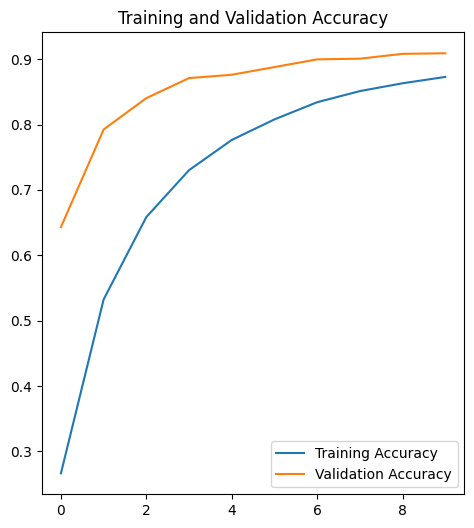

In [13]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

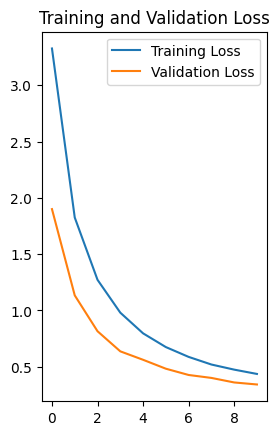

In [14]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
model.save("fruit_classifier.h5")


In [16]:
from tensorflow.keras.models import load_model

model = load_model("fruit_classifier.h5")



In [19]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load an image (replace 'path_to_image' with actual image path)
img_path = "/kaggle/input/appledataset1/apple.jpg"
img = image.load_img(img_path, target_size=(100, 100))  # Resize to match model input
img_array = image.img_to_array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)  # Get class index
class_labels = list(train_generator.class_indices.keys())  # Class names
predicted_label = class_labels[predicted_class]

print(f"Predicted Fruit: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Fruit: Nectarine 1
